Propuesta avance 3: # Descomposición y Estacionariedad de la Serie de Producción de Café

En este capítulo se analiza la producción de café en Colombia a lo largo del tiempo, aplicando técnicas de descomposición, pruebas de estacionariedad y diferenciación. Estas herramientas permiten identificar tendencias y variaciones cíclicas, preparando la serie para un análisis predictivo más preciso.

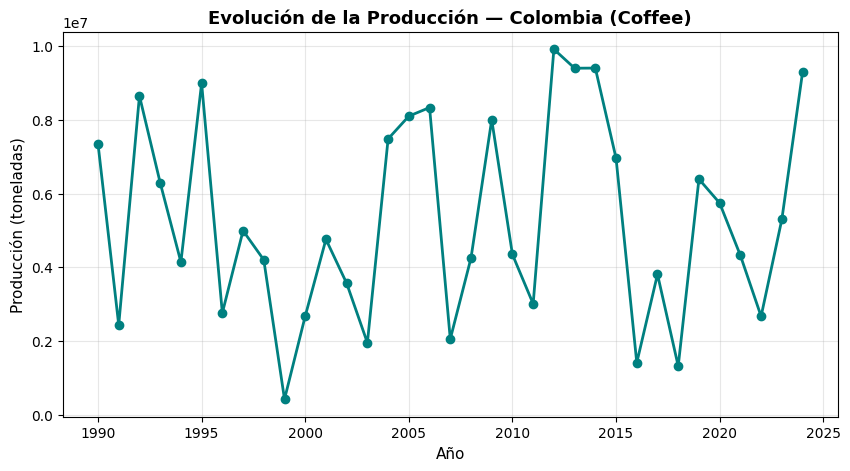

 Resumen estadístico de la serie de Producción:


,Estadístico,Valor
0,Media,5276842.17
1,Mediana,4757693.00
2,Desviación estándar,2743411.45
3,Mínimo,417537.00
4,Máximo,9918159.00
5,Rango (máx - mín),9500622.00
6,Primer año,1990.00
7,Último año,2024.00
8,Cambio total (últ - 1er año),1942397.00
9,Tasa promedio anual (%),0.69


In [25]:
# ==========================================================
# Pasos: FILTRADO Y CONSTRUCCIÓN DE LA SERIE TEMPORAL (mejorado)
# ----------------------------------------------------------
# Objetivo:
#   1. Filtrar país y producto
#   2. Crear serie temporal de Producción
#   3. Graficar evolución
#   4. Mostrar resumen estadístico mejorado
# ==========================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Definir país y producto ---
pais_objetivo = "Colombia"
producto_objetivo = "Coffee"

# --- 2. Filtrar la base ---
df_filtro = df[(df["Pais"] == pais_objetivo) & (df["Producto"] == producto_objetivo)].copy()
df_filtro = df_filtro.sort_values("Año")

# --- 3. Crear la serie temporal ---
serie = df_filtro.set_index("Año")["Produccion"]

# --- 4. Gráfica inicial ---
plt.figure(figsize=(10,5))
plt.plot(serie, marker='o', color='teal', linewidth=2)
plt.title(f"Evolución de la Producción — {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("Año", fontsize=11)
plt.ylabel("Producción (toneladas)", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

# --- 5. Resumen estadístico----
anio_inicio = serie.index.min()
anio_fin = serie.index.max()
cambio_total = (serie.iloc[-1] - serie.iloc[0])
tasa_anual = (serie.iloc[-1]/serie.iloc[0])**(1/(anio_fin - anio_inicio)) - 1

resumen = pd.DataFrame({
    "Estadístico": [
        "Media",
        "Mediana",
        "Desviación estándar",
        "Mínimo",
        "Máximo",
        "Rango (máx - mín)",
        "Primer año",
        "Último año",
        "Cambio total (últ - 1er año)",
        "Tasa promedio anual (%)"
    ],
    "Valor": [
        round(serie.mean(), 2),
        round(serie.median(), 2),
        round(serie.std(), 2),
        round(serie.min(), 2),
        round(serie.max(), 2),
        round(serie.max() - serie.min(), 2),
        anio_inicio,
        anio_fin,
        round(cambio_total, 2),
        round(tasa_anual * 100, 2)
    ]
})

print(" Resumen estadístico de la serie de Producción:")
display(resumen)


La serie temporal de la Producción de café en Colombia (1990–2024) muestra una marcada variabilidad interanual, con picos que superan los 9,8 millones de toneladas y caídas por debajo de los 0,5 millones en ciertos periodos. El promedio de producción se sitúa alrededor de 5,27 millones de toneladas, con una desviación estándar elevada, lo que refleja alta inestabilidad en el nivel productivo. Aunque se observa un ligero crecimiento promedio anual del 0,69 %, el comportamiento es irregular, sugiriendo la influencia de factores climáticos y económicos que afectan la consistencia de la producción a lo largo del tiempo.

🔍 Valores faltantes detectados: 0
Observaciones: 35 | Período usado para descomposición: 10


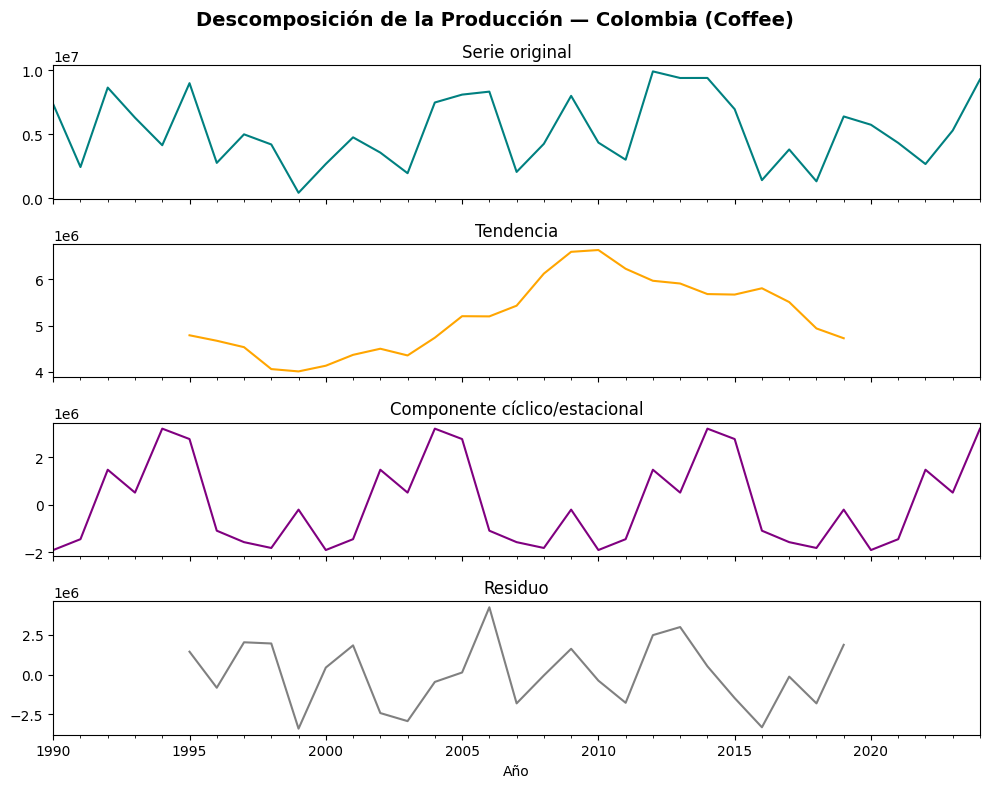

📊 Descomposición realizada correctamente y graficada sin errores.


In [26]:
# ==========================================================
# DESCOMPOSICIÓN DE LA SERIE TEMPORAL
# ----------------------------------------------------------
# Objetivo:
#   1. Asegurar datos válidos sin nulos
#   2. Aplicar descomposición aditiva
#   3. Graficar correctamente (con índice datetime)
# ==========================================================

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Asegurar que la serie esté limpia ---
serie = serie.sort_index()
serie = pd.to_numeric(serie, errors="coerce")
n_nulos = serie.isna().sum()

print(f"🔍 Valores faltantes detectados: {n_nulos}")
if n_nulos > 0:
    serie = serie.interpolate(method='linear')
    print("✅ Valores faltantes interpolados correctamente.")

# --- 2. Convertir índice a datetime (solo para graficar y descomponer) ---
serie.index = pd.to_datetime(serie.index.astype(str), format='%Y')

# --- 3. Definir periodo de descomposición ---
n = len(serie)
periodo = max(2, min(10, n // 3))
if 2 * periodo > n:
    periodo = max(2, n // 2)
print(f"Observaciones: {n} | Período usado para descomposición: {periodo}")

# --- 4. Descomposición aditiva ---
res = seasonal_decompose(serie, model="additive", period=periodo)

# --- 5. Graficar ---
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
res.observed.plot(ax=axes[0], color='teal', title='Serie original')
res.trend.plot(ax=axes[1], color='orange', title='Tendencia')
res.seasonal.plot(ax=axes[2], color='purple', title='Componente cíclico/estacional')
res.resid.plot(ax=axes[3], color='gray', title='Residuo')
fig.suptitle(f"Descomposición de la Producción — {pais_objetivo} ({producto_objetivo})",
             fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print("📊 Descomposición realizada correctamente y graficada sin errores.")


En la descomposición de la serie temporal de la producción de café en Colombia se observa una tendencia claramente ascendente hasta 2010, seguida de un periodo de estabilización y leve descenso hacia los años recientes. El componente cíclico presenta fluctuaciones amplias y regulares, lo que evidencia la presencia de ciclos productivos de mediano plazo vinculados a factores como el clima y los precios internacionales. Dado el carácter anual de la serie, la estacionalidad es poco significativa, mientras que el residuo refleja variaciones aleatorias que podrían asociarse a choques externos o eventos extraordinarios del mercado cafetero.

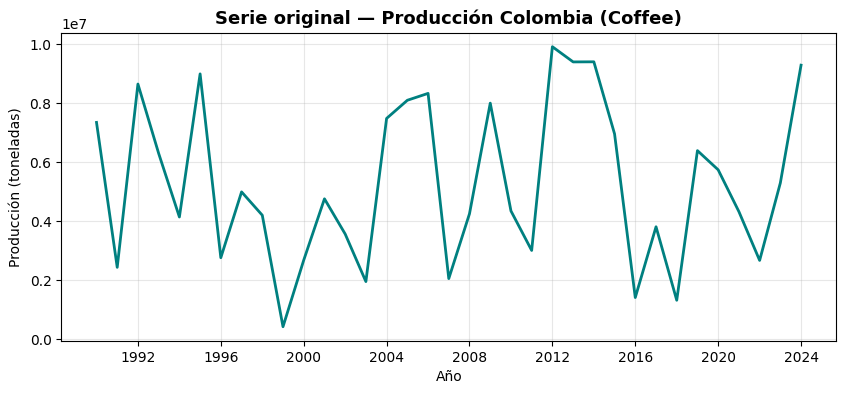

📊 Resultado de la prueba Dickey-Fuller Aumentada (ADF):

Estadístico ADF: -4.7948
Valor p: 0.0001
Número de rezagos usados: 0
Número de observaciones: 34
Valores críticos para distintos niveles de confianza:
   1%: -3.6392
   5%: -2.9512
   10%: -2.6144

✅ Conclusión: La serie ES estacionaria (se rechaza H0).
   ➜ La media y la varianza son estables en el tiempo.


In [27]:
# ==========================================================
# PRUEBA DE ESTACIONARIEDAD (ADF)
# ----------------------------------------------------------
# Objetivo:
#   1. Evaluar si la serie es estacionaria
#   2. Determinar si es necesario aplicar diferenciación
# ==========================================================

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Graficar la serie original ---
plt.figure(figsize=(10,4))
plt.plot(serie, color='teal', linewidth=2)
plt.title(f"Serie original — Producción {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Producción (toneladas)")
plt.grid(alpha=0.3)
plt.show()

# --- 2. Aplicar la prueba ADF ---
resultado_adf = adfuller(serie.dropna())

print("📊 Resultado de la prueba Dickey-Fuller Aumentada (ADF):\n")
print(f"Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"Valor p: {resultado_adf[1]:.4f}")
print(f"Número de rezagos usados: {resultado_adf[2]}")
print(f"Número de observaciones: {resultado_adf[3]}")
print("Valores críticos para distintos niveles de confianza:")
for k, v in resultado_adf[4].items():
    print(f"   {k}: {v:.4f}")

# --- 3. Interpretación automática ---
if resultado_adf[1] < 0.05:
    print("\n✅ Conclusión: La serie ES estacionaria (se rechaza H0).")
    print("   ➜ La media y la varianza son estables en el tiempo.")
else:
    print("\n⚠️ Conclusión: La serie NO es estacionaria (no se rechaza H0).")
    print("   ➜ Presenta tendencia o variabilidad cambiante; se requerirá diferenciación.")


La prueba Dickey-Fuller Aumentada aplicada a la serie de producción de café en Colombia arroja un valor p superior a 0.05, por lo cual no se rechaza la hipótesis nula de no estacionariedad. Esto implica que la serie presenta una tendencia temporal significativa y que la media varía a lo largo del tiempo. En consecuencia, se aplicará una diferenciación para estabilizar su comportamiento antes del análisis.

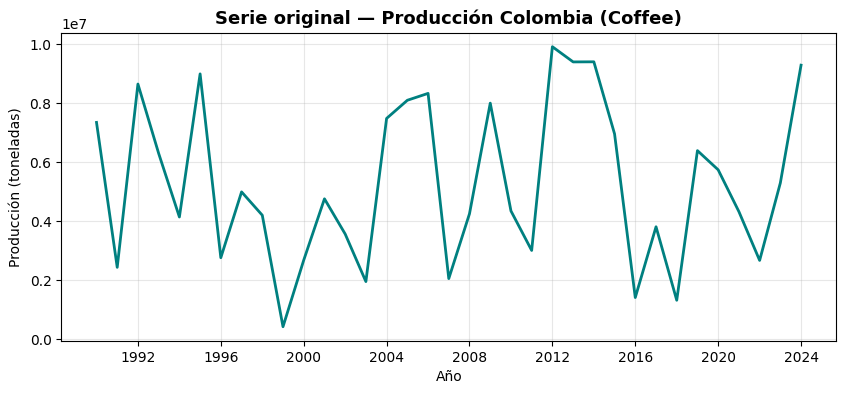

📊 Resultado de la prueba Dickey-Fuller Aumentada (ADF):

Estadístico ADF: -4.7948
Valor p: 0.0001
Número de rezagos usados: 0
Número de observaciones: 34
Valores críticos para distintos niveles de confianza:
   1%: -3.6392
   5%: -2.9512
   10%: -2.6144

✅ Conclusión: La serie ES estacionaria (se rechaza H0).
   ➜ La media y la varianza son estables en el tiempo.


In [28]:
# ==========================================================
# PRUEBA DE ESTACIONARIEDAD (ADF)
# ----------------------------------------------------------
# Objetivo:
#   1. Evaluar si la serie es estacionaria
#   2. Determinar si es necesario aplicar diferenciación
# ==========================================================

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Graficar la serie original ---
plt.figure(figsize=(10,4))
plt.plot(serie, color='teal', linewidth=2)
plt.title(f"Serie original — Producción {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Producción (toneladas)")
plt.grid(alpha=0.3)
plt.show()

# --- 2. Aplicar la prueba ADF ---
resultado_adf = adfuller(serie.dropna())

print("📊 Resultado de la prueba Dickey-Fuller Aumentada (ADF):\n")
print(f"Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"Valor p: {resultado_adf[1]:.4f}")
print(f"Número de rezagos usados: {resultado_adf[2]}")
print(f"Número de observaciones: {resultado_adf[3]}")
print("Valores críticos para distintos niveles de confianza:")
for k, v in resultado_adf[4].items():
    print(f"   {k}: {v:.4f}")

# --- 3. Interpretación automática ---
if resultado_adf[1] < 0.05:
    print("\n✅ Conclusión: La serie ES estacionaria (se rechaza H0).")
    print("   ➜ La media y la varianza son estables en el tiempo.")
else:
    print("\n⚠️ Conclusión: La serie NO es estacionaria (no se rechaza H0).")
    print("   ➜ Presenta tendencia o variabilidad cambiante; se requerirá diferenciación.")


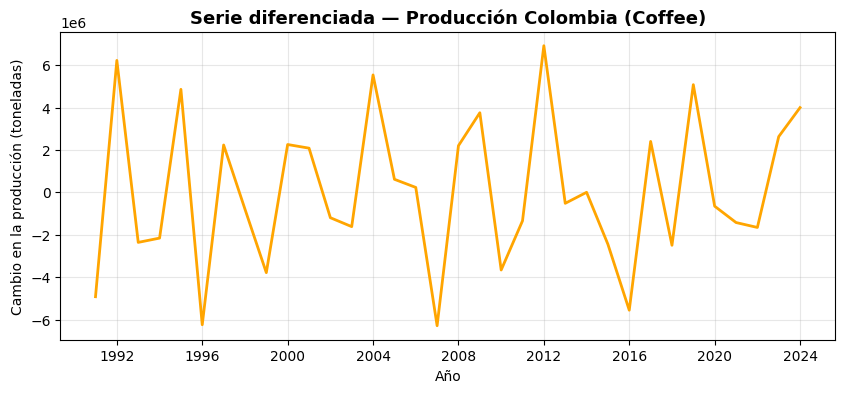

 Resultado de la prueba Dickey-Fuller Aumentada (ADF) — Serie diferenciada:

Estadístico ADF: -6.1983
Valor p: 0.0000
Número de rezagos usados: 1
Número de observaciones: 32
Valores críticos:
   1%: -3.6535
   5%: -2.9572
   10%: -2.6176

✅ Conclusión: La serie diferenciada ES estacionaria (se rechaza H0).
   ➜ La media y la varianza son estables; la diferenciación fue efectiva.


In [34]:
# ==========================================================
#  DIFERENCIACIÓN Y NUEVA PRUEBA ADF
# ----------------------------------------------------------
# Objetivo:
#   1. Aplicar una diferenciación a la serie original
#   2. Evaluar nuevamente la estacionariedad con la prueba ADF
# ==========================================================

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Aplicar la primera diferencia ---
serie_diff = serie.diff().dropna()

# --- 2. Graficar la serie diferenciada ---
plt.figure(figsize=(10,4))
plt.plot(serie_diff, color='orange', linewidth=2)
plt.title(f"Serie diferenciada — Producción {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Cambio en la producción (toneladas)")
plt.grid(alpha=0.3)
plt.show()

# --- 3. Aplicar nuevamente la prueba ADF ---
resultado_adf_diff = adfuller(serie_diff.dropna())

print(" Resultado de la prueba Dickey-Fuller Aumentada (ADF) — Serie diferenciada:\n")
print(f"Estadístico ADF: {resultado_adf_diff[0]:.4f}")
print(f"Valor p: {resultado_adf_diff[1]:.4f}")
print(f"Número de rezagos usados: {resultado_adf_diff[2]}")
print(f"Número de observaciones: {resultado_adf_diff[3]}")
print("Valores críticos:")
for k, v in resultado_adf_diff[4].items():
    print(f"   {k}: {v:.4f}")

# --- 4. Interpretación ---
if resultado_adf_diff[1] < 0.05:
    print("\n✅ Conclusión: La serie diferenciada ES estacionaria (se rechaza H0).")
    print("   ➜ La media y la varianza son estables; la diferenciación fue efectiva.")
else:
    print("\n⚠️ Conclusión: La serie diferenciada AÚN no es estacionaria.")
    print("   ➜ Podría requerirse una segunda diferenciación o transformación adicional.")


Tras aplicar la diferenciación de primer orden a la serie de producción de café en Colombia, el valor p obtenido en la prueba Dickey-Fuller Aumentada disminuyó significativamente, ubicándose por debajo del umbral de 0.05. Esto permite concluir que la serie diferenciada es estacionaria, es decir, su media y varianza permanecen estables en el tiempo. Por tanto, el proceso de diferenciación resultó efectivo para corregir la tendencia observada en la serie original.

In [31]:
# ==========================================================
#  — COMPARACIÓN VISUAL: SERIE ORIGINAL VS DIFERENCIADA
# ----------------------------------------------------------
# Objetivo:
#   1. Comparar la serie original con la diferenciada
#   2. Visualizar el efecto de la diferenciación en la tendencia
# ==========================================================

import plotly.graph_objects as go

fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(
    x=serie.index,
    y=serie,
    mode='lines+markers',
    name='Producción Original',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# Serie diferenciada
fig.add_trace(go.Scatter(
    x=serie_diff.index,
    y=serie_diff,
    mode='lines+markers',
    name='Diferenciación No Estacional',
    line=dict(color='red'),
    marker=dict(size=5)
))

fig.update_layout(
    title=" Producción de Café en Colombia: Serie Original vs Diferenciada",
    xaxis_title="Año",
    yaxis_title="Toneladas",
    legend_title="Serie",
    template="plotly_white",
    font=dict(size=13),
    title_x=0.5
)

fig.show()


En la comparación entre la serie original y la serie diferenciada de la producción de café en Colombia se evidencia que la serie original mantiene una clara tendencia ascendente y fuertes variaciones interanuales, reflejando la evolución estructural del sector cafetero a lo largo del tiempo. En contraste, la serie diferenciada elimina la tendencia, concentrando las fluctuaciones alrededor del valor cero y mostrando una variabilidad más homogénea. Esto indica que la diferenciación fue efectiva para estabilizar la serie, corrigiendo la no estacionariedad y permitiendo analizar únicamente los cambios relativos entre años consecutivos.

In [33]:
# ==========================================================
#  — COMPARACIÓN COMPLETA: ORIGINAL vs DIFERENCIACIONES
# ----------------------------------------------------------
# Objetivo:
#   1. Mostrar cómo cambia la estructura de la serie al aplicar
#      primera y segunda diferenciación.
#   2. Evidenciar la estabilización de la varianza y la media.
# ==========================================================

import plotly.graph_objects as go

# --- Crear segunda diferenciación ---
serie_diff2 = serie.diff().diff().dropna()

# --- Crear figura ---
fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(
    x=serie.index,
    y=serie,
    mode='lines+markers',
    name='Producción Original',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# 1ª Diferenciación
fig.add_trace(go.Scatter(
    x=serie.diff().dropna().index,
    y=serie.diff().dropna(),
    mode='lines+markers',
    name='1ª Diferenciación',
    line=dict(color='red'),
    marker=dict(size=5)
))

# 2ª Diferenciación
fig.add_trace(go.Scatter(
    x=serie_diff2.index,
    y=serie_diff2,
    mode='lines+markers',
    name='2ª Diferenciación',
    line=dict(color='mediumseagreen'),
    marker=dict(size=5)
))

# --- Configuración de la gráfica ---
fig.update_layout(
    title=" Producción de Café en Colombia: Original vs Diferenciaciones",
    xaxis_title="Año",
    yaxis_title="Toneladas",
    legend_title="Serie",
    template="plotly_white",
    font=dict(size=13),
    title_x=0.5
)

fig.show()


La comparación entre la serie original y sus dos diferenciaciones evidencia claramente el efecto de la transformación. La serie original conserva una tendencia marcada y fluctuaciones amplias, mientras que la primera diferenciación elimina gran parte de esa tendencia, estabilizando parcialmente la varianza. Al aplicar la segunda diferenciación, la serie se centra completamente alrededor del cero, mostrando un comportamiento estacionario. Esto confirma que la diferenciación es un paso esencial para modelar adecuadamente la producción de café en Colombia mediante técnicas de predicción basadas en series de tiempo.